# 📊 E-Commerce Data Analysis

Analisi esplorativa sul dataset di vendite di un e-commerce UK. Obiettivo: individuare trend di vendita, prodotti più redditizi e comportamenti dei clienti.

## 📖 Indice
1. Import librerie
2. Caricamento dataset
3. Pulizia dati
4. Analisi esplorativa
5. Visualizzazioni
6. Conclusioni

## 📦 Import librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta lo stile dei grafici
sns.set(style='whitegrid')

## 📂 Caricamento dataset

In [2]:
# Carica il dataset
df = pd.read_csv('/kaggle/input/ukdata/data.csv', encoding= 'unicode_escape')
# Copia data set per controllo accurato
extra_df = df.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 🧹 Pulizia dati

In [3]:
# Controllo valori nulli e tipi di dato
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 🔍 Analisi esplorativa

### 📌 1. Quanti ordini totali sono stati effettuati?

In [4]:
# Count distinct values, use .nunique():
total_orders = df['InvoiceNo'].nunique()
print(f'The total number of orders is: {total_orders} Orders')

The total number of orders is: 25900 Orders


### 📌 2. Qual è il valore totale delle vendite?

In [5]:
# Scrivi qui la tua analisi
orders_group = df[['StockCode','Quantity','UnitPrice']].copy()
orders_group['Total'] = orders_group['Quantity'] * orders_group['UnitPrice']
total_sales = round(orders_group['Total'].sum(),2)
print(f'Our E-Commerce generated a total revenue of: £{total_sales}')

Our E-Commerce generated a total revenue of: £9747747.93


### 📌 3. Qual è stato il giorno con il maggiore volume di vendite?

In [6]:
# Scrivi qui la tua analisi
df['InvoiceDate_date'] = pd.to_datetime(df['InvoiceDate'], dayfirst=False, errors='coerce')
df['InvoiceDate_only_date'] = df['InvoiceDate_date'].dt.date
best_day = df.groupby('InvoiceDate_only_date')['InvoiceNo'].nunique()
top_day = best_day.idxmax()
top_sales_count = best_day.max()
#idxmax return the index with the max values possible, in this case the index is the date
print(f"The day with the most transactions was {top_day} with {top_sales_count} invoices.")

best_day_quantity = df.groupby('InvoiceDate_only_date')['Quantity'].sum()
top_day_qty = best_day_quantity.idxmax()
top_qty = best_day_quantity.max()

print(f"The day with the most items sold was {top_day_qty} with {top_qty} items.")

df['Sales'] = df['Quantity'] * df['UnitPrice']

best_day_sales = df.groupby('InvoiceDate_only_date')['Sales'].sum()
top_day_sales = best_day_sales.idxmax()
top_sales = best_day_sales.max()

print(f"The highest revenue day was {top_day_sales} with £{top_sales:.2f} in sales.")


The day with the most transactions was 2011-10-06 with 218 invoices.
The day with the most items sold was 2011-10-05 with 46161 items.
The highest revenue day was 2011-11-14 with £112141.11 in sales.


## Ulteriori Analisi

1. Quanti ordini totali sono stati effettuati?


In [7]:
filtering_orders = extra_df[~extra_df['InvoiceNo'].str.startswith('C')]
fullfilled_orders = filtering_orders['InvoiceNo'].nunique()
print(f"The total number of fullfilled orders is: {fullfilled_orders}")

The total number of fullfilled orders is: 22064


2. Qual è il valore totale delle vendite?

In [8]:
revenue_total = extra_df[~extra_df['InvoiceNo'].str.startswith(('C','A'))].copy()
revenue_total['order_revenue'] = extra_df['Quantity']*extra_df['UnitPrice']
filtered_orders = revenue_total['order_revenue'].sum()
print(f'The total amount of revenue from the fullfilled orders is: £{filtered_orders:.2f}')

The total amount of revenue from the fullfilled orders is: £10655622.48


3. Qual è stato il giorno con il maggiore volume di vendite?

In [9]:
best_day_2 = extra_df.copy()
best_day_2['OrderDate'] = pd.to_datetime(best_day_2['InvoiceDate']).dt.date

filtered_best_day = best_day_2.groupby('OrderDate')['InvoiceNo'].count().sort_values(ascending = False)

max_date = filtered_best_day.idxmax()
max_orders = filtered_best_day.max()

print(f"The day with the most amount of orders is:  {max_date} with {max_orders} Orders")

The day with the most amount of orders is:  2011-12-05 with 5331 Orders


4. Quali sono i 5 prodotti che hanno generato il maggior fatturato totale?

In [10]:
best_product = extra_df.copy()
best_product['order_revenue'] = extra_df['Quantity']*extra_df['UnitPrice']
top_five = best_product.groupby('Description')['Description'].count().sort_values(ascending = False).head(5)
print(f'The top 5 products sold are: {top_five}')

The top 5 products sold are: Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64


5. Qual è il cliente che ha speso di più? 

In [11]:
best_client = extra_df.copy()
best_client['order_revenue'] = extra_df['Quantity']*extra_df['UnitPrice']
filtered_client = best_client.groupby('CustomerID')['order_revenue'].sum()
best_id = filtered_client.idxmax()
best_revenue = filtered_client.max()
print(f'The best Customer is CustomerID {best_id} with £{best_revenue:.2f} spent')

The best Customer is CustomerID 14646.0 with £279489.02 spent


### 📊 Visualizzazioni

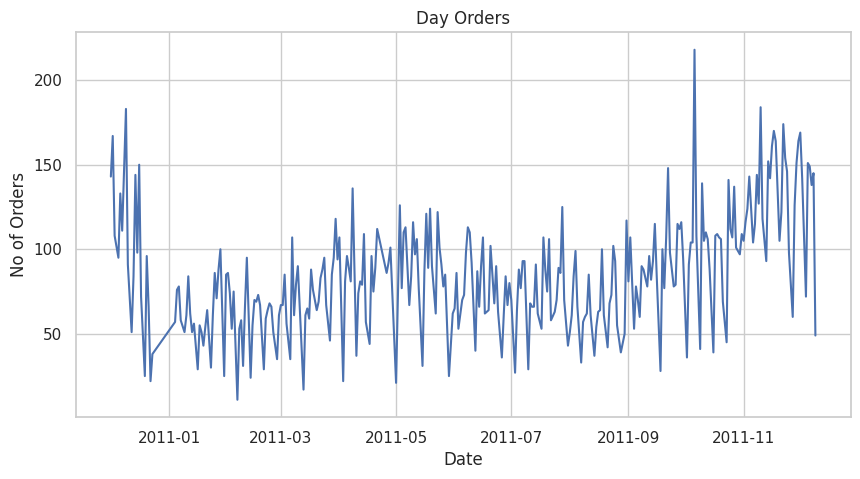

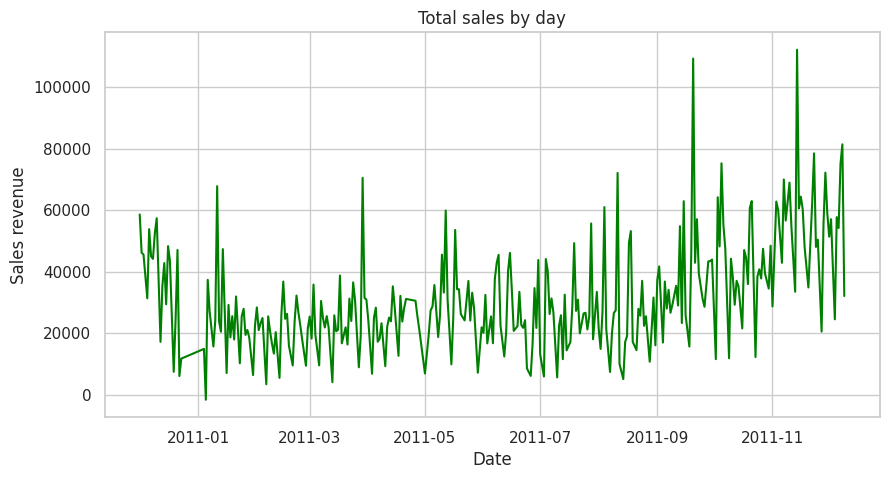

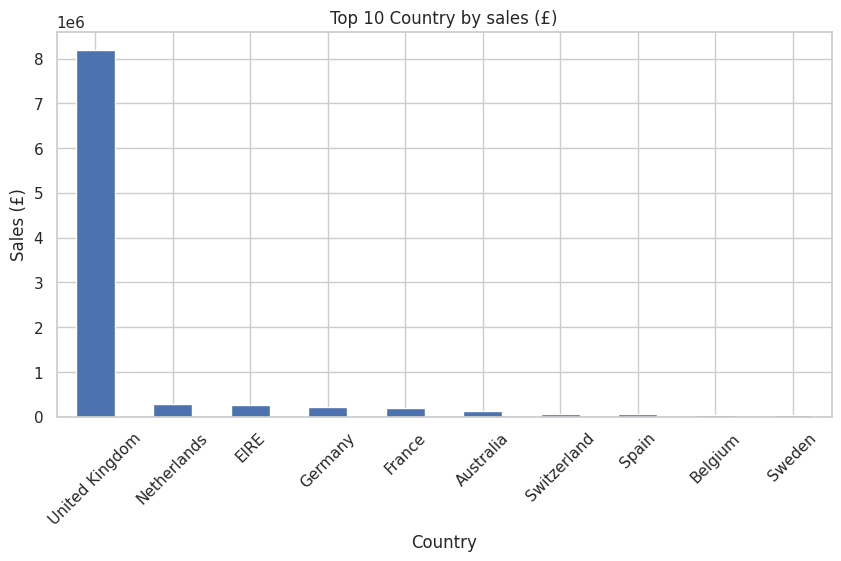

In [12]:
#Numero di ordini per giorno
plt.figure(figsize=(10,5))
best_day.plot()
plt.title('Day Orders')
plt.xlabel('Date')
plt.ylabel('No of Orders')
plt.grid(True)
plt.show()

# Vendite totali per giorno
plt.figure(figsize=(10,5))
best_day_sales.plot(color='green')
plt.title('Total sales by day')
plt.xlabel('Date')
plt.ylabel('Sales revenue')
plt.grid(True)
plt.show()

#Top 10 Paesi per vendite totali
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
country_sales.plot(kind='bar')
plt.title('Top 10 Country by sales (£)')
plt.xlabel('Country')
plt.ylabel('Sales (£)')
plt.xticks(rotation=45)
plt.show()



## 📝 Conclusioni

- Il totale degli ordini effettuati nel periodo di riferimento è di **25900 ordini**.di cui **3836 ordini annullati**
- Il valore complessivo delle vendite generate dall'e-commerce è di **£10655622.48**.
- Il giorno con il maggior numero di transazioni è stato **2011-10-06** con **con 218 ordini**, mentre il giorno con il maggior numero di articoli venduti è stato **2011-10-05** con **46161 articoli**.
- Il giorno con il fatturato più alto è stato **2011-11-14**, totalizzando **£112141.11** di vendite.

### 📌 Considerazioni:
- La maggior parte delle vendite si concentra in pochi giorni chiave, che potrebbero coincidere con promozioni o festività.
- I dati contengono diversi ordini annullati (Invoice che iniziano con 'C'), che è importante considerare per eventuali analisi di resi e customer satisfaction.
- È consigliabile approfondire ulteriormente l’analisi dei clienti top e dei prodotti più redditizi per costruire strategie di upselling o fidelizzazione.

### 🔍 Possibili sviluppi futuri:
- Creare una dashboard interattiva per monitorare KPI come vendite giornaliere, top prodotti e customer lifetime value.
- Eseguire un'analisi stagionale o settimanale per identificare pattern ricorrenti nelle vendite.
- Analizzare il comportamento di acquisto per paese e fascia oraria.
